<h1>Импорт библиотек

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [5]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])
    for A, b in zip(X, V):
        result += A @ b
    return result
class TestSumProd(unittest.TestCase):
    def test_single_matrix_vector(self):
        X = [np.array([[2, 0], [1, 3]])]
        V = [np.array([[1], [2]])]
        result = sum_prod(X, V)
        expected = X[0] @ V[0]
        np.testing.assert_array_equal(result, expected)

    def test_multiple_matrix_vectors(self):
        X = [
            np.array([[1, 0], [0, 1]]),
            np.array([[2, 2], [0, 1]])
        ]
        V = [
            np.array([[1], [1]]),
            np.array([[2], [3]])
        ]
        result = sum_prod(X, V)
        expected = X[0] @ V[0] + X[1] @ V[1]
        np.testing.assert_array_equal(result, expected)

    def test_zero_result(self):
        X = [
            np.array([[1, 0], [0, 1]]),
            np.array([[-1, 0], [0, -1]])
        ]
        V = [
            np.array([[5], [6]]),
            np.array([[5], [6]])
        ]
        result = sum_prod(X, V)
        expected = np.array([[0], [0]])
        np.testing.assert_array_equal(result, expected)

    def test_large_case(self):
        n = 100
        p = 10
        X = [np.eye(n) for _ in range(p)]
        V = [np.ones((n, 1)) for _ in range(p)]
        result = sum_prod(X, V)
        expected = p * np.ones((n, 1))
        np.testing.assert_array_equal(result, expected)
        # Запуск тестов
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

....
----------------------------------------------------------------------
Ran 4 tests in 0.018s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [6]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)
class TestBinarize(unittest.TestCase):
    def test_basic_case(self):
        M = np.array([[0.2, 0.7], [0.5, 0.9]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[0, 1], [0, 1]])
        np.testing.assert_array_equal(result, expected)

    def test_all_zeros(self):
        M = np.array([[0.1, 0.3], [0.2, 0.4]])
        result = binarize(M, threshold=0.5)
        expected = np.zeros_like(M, dtype=int)
        np.testing.assert_array_equal(result, expected)

    def test_all_ones(self):
        M = np.array([[0.6, 1.2], [0.9, 0.51]])
        result = binarize(M, threshold=0.5)
        expected = np.ones_like(M, dtype=int)
        np.testing.assert_array_equal(result, expected)

    def test_custom_threshold(self):
        M = np.array([[1, 2], [3, 4]])
        result = binarize(M, threshold=2.5)
        expected = np.array([[0, 0], [1, 1]])
        np.testing.assert_array_equal(result, expected)

    def test_negative_values(self):
        M = np.array([[-1, 0], [1, 2]])
        result = binarize(M, threshold=0)
        expected = np.array([[0, 0], [1, 1]])
        np.testing.assert_array_equal(result, expected)
# Запуск тестов
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.015s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [7]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, col]) for col in range(mat.shape[1])]
class TestUniqueElements(unittest.TestCase):
    def test_unique_rows(self):
        mat = np.array([
            [1, 2, 2],
            [3, 3, 3],
            [4, 5, 4]
        ])
        result = unique_rows(mat)
        expected = [
            np.array([1, 2]),
            np.array([3]),
            np.array([4, 5])
        ]
        for r, e in zip(result, expected):
            np.testing.assert_array_equal(r, e)

    def test_unique_columns(self):
        mat = np.array([
            [1, 3, 5],
            [1, 3, 6],
            [2, 3, 5]
        ])
        result = unique_columns(mat)
        expected = [
            np.array([1, 2]),
            np.array([3]),
            np.array([5, 6])
        ]
        for r, e in zip(result, expected):
            np.testing.assert_array_equal(r, e)

    def test_empty_matrix(self):
        mat = np.array([[]]).reshape(0, 0)
        self.assertEqual(unique_rows(mat), [])
        self.assertEqual(unique_columns(mat), [])

    def test_single_element(self):
        mat = np.array([[42]])
        self.assertEqual(len(unique_rows(mat)), 1)
        self.assertEqual(len(unique_columns(mat)), 1)
        np.testing.assert_array_equal(unique_rows(mat)[0], np.array([42]))
        np.testing.assert_array_equal(unique_columns(mat)[0], np.array([42]))
# Запуск тестов
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

.............
----------------------------------------------------------------------
Ran 13 tests in 0.027s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание по строкам: [ 0.45900297  0.43711925 -0.86507665]
Дисперсия по строкам: [0.4012743  0.53942014 0.67688013]
Математическое ожидание по столбцам: [-0.06694683  0.32507292  0.55236185 -0.28657492 -0.47217039]
Дисперсия по столбцам: [0.16761846 0.80430571 0.05056381 1.98476396 0.88523537]


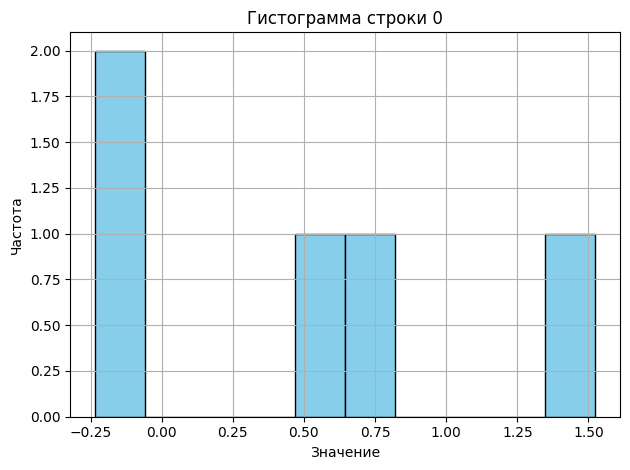

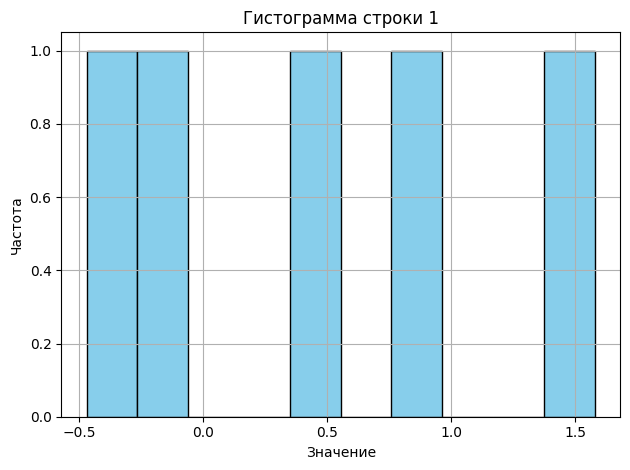

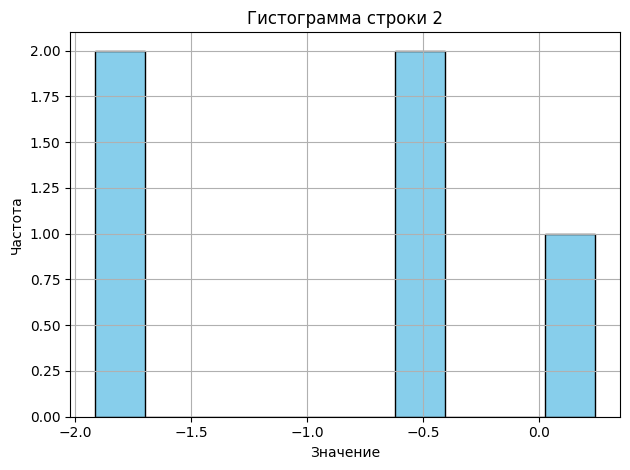

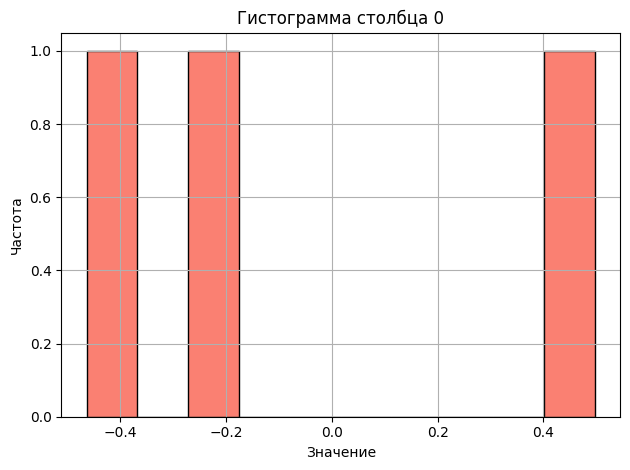

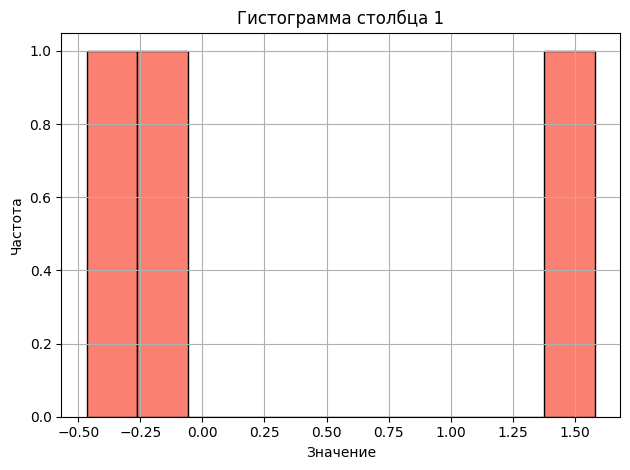

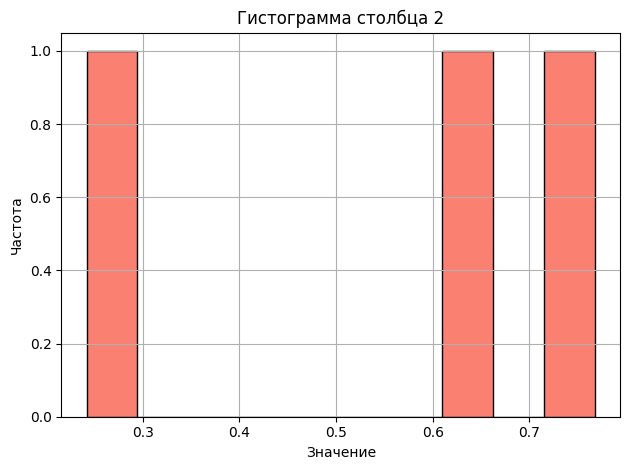

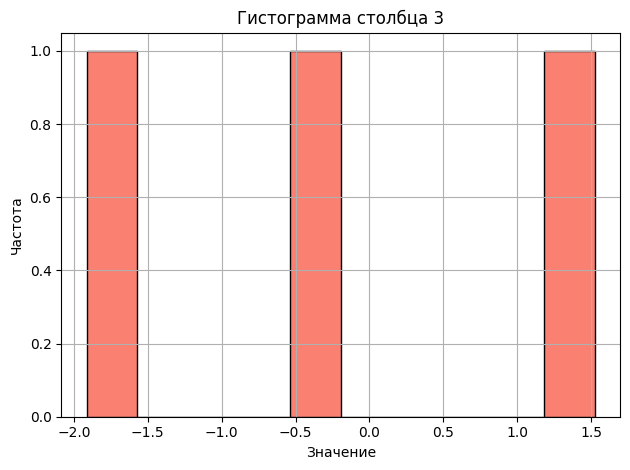

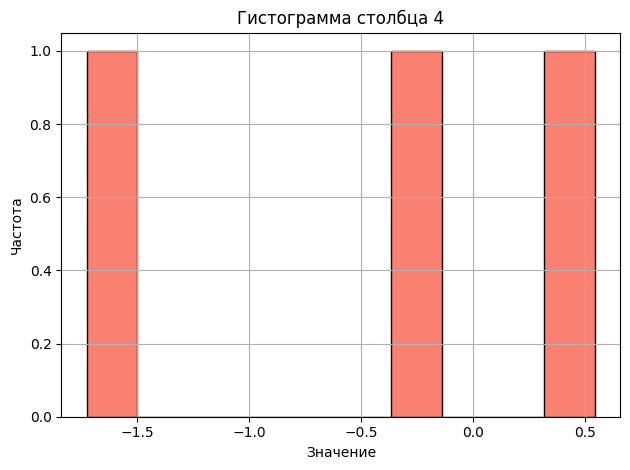

In [9]:
def analyze_normal_matrix(m, n, mu=0, sigma=1, seed=None):
    if seed is not None:
        np.random.seed(seed)

    mat = np.random.normal(loc=mu, scale=sigma, size=(m, n))

    # Среднее и дисперсия по строкам и столбцам
    row_means = np.mean(mat, axis=1)
    row_vars = np.var(mat, axis=1)

    col_means = np.mean(mat, axis=0)
    col_vars = np.var(mat, axis=0)

    print("Математическое ожидание по строкам:", row_means)
    print("Дисперсия по строкам:", row_vars)
    print("Математическое ожидание по столбцам:", col_means)
    print("Дисперсия по столбцам:", col_vars)

    # Гистограммы строк
    for i in range(m):
        plt.figure()
        plt.hist(mat[i, :], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Гистограмма строки {i}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Гистограммы столбцов
    for j in range(n):
        plt.figure()
        plt.hist(mat[:, j], bins=10, color='salmon', edgecolor='black')
        plt.title(f'Гистограмма столбца {j}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return mat, row_means, row_vars, col_means, col_vars
if __name__ == "__main__":
    analyze_normal_matrix(m=3, n=5, mu=0, sigma=1, seed=42)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [10]:
def chess(m, n, a, b):
    mat = np.zeros((m, n), dtype=type(a) if isinstance(a, type(b)) else object)
    for i in range(m):
        for j in range(n):
            mat[i, j] = a if (i + j) % 2 == 0 else b
    return mat
class TestChessMatrix(unittest.TestCase):
    def test_2x2_int(self):
        result = chess(2, 2, 1, 0)
        expected = np.array([[1, 0],
                             [0, 1]])
        np.testing.assert_array_equal(result, expected)

    def test_3x3_chars(self):
        result = chess(3, 3, 'X', 'O')
        expected = np.array([
            ['X', 'O', 'X'],
            ['O', 'X', 'O'],
            ['X', 'O', 'X']
        ])
        np.testing.assert_array_equal(result, expected)

    def test_1x4(self):
        result = chess(1, 4, 1, 2)
        expected = np.array([[1, 2, 1, 2]])
        np.testing.assert_array_equal(result, expected)

    def test_4x1(self):
        result = chess(4, 1, 1, 2)
        expected = np.array([[1], [2], [1], [2]])
        np.testing.assert_array_equal(result, expected)

    def test_different_types(self):
        result = chess(2, 2, 'A', 5)
        expected = np.array([['A', 5],
                             [5, 'A']], dtype=object)
        np.testing.assert_array_equal(result, expected)
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..................
----------------------------------------------------------------------
Ran 18 tests in 0.030s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [11]:
def draw_rectangle(m, n, a, b, bg_color=(255, 255, 255), rect_color=(0, 0, 0)):
    img = np.ones((m, n, 3), dtype=np.uint8) * np.array(bg_color, dtype=np.uint8)

    top = (m - a) // 2
    left = (n - b) // 2

    img[top:top+a, left:left+b] = rect_color

    return img


def draw_ellipse(m, n, a, b, bg_color=(255, 255, 255), ellipse_color=(0, 0, 0)):
    img = np.ones((m, n, 3), dtype=np.uint8) * np.array(bg_color, dtype=np.uint8)

    y, x = np.ogrid[:m, :n]
    x0, y0 = n // 2, m // 2

    mask = ((x - x0)**2 / a**2 + (y - y0)**2 / b**2) <= 1
    img[mask] = ellipse_color

    return img
class TestShapes(unittest.TestCase):
    def test_rectangle_centered(self):
        img = draw_rectangle(100, 100, 20, 30, bg_color=(255,255,255), rect_color=(0,0,0))
        center_pixel = img[50, 50]
        self.assertTrue((center_pixel == [0,0,0]).all())

    def test_ellipse_centered(self):
        img = draw_ellipse(100, 100, 30, 20, bg_color=(255,255,255), ellipse_color=(0,0,255))
        center_pixel = img[50, 50]
        self.assertTrue((center_pixel == [0,0,255]).all())

    def test_rectangle_outside_area(self):
        img = draw_rectangle(50, 50, 60, 60, bg_color=(100, 100, 100), rect_color=(255, 0, 0))
        # Проверим, что ничего не вышло за границы
        self.assertEqual(img.shape, (50, 50, 3))

    def test_ellipse_bounds(self):
        img = draw_ellipse(100, 100, 10, 10, bg_color=(0, 0, 0), ellipse_color=(255, 255, 255))
        self.assertEqual(img[50, 50].tolist(), [255, 255, 255])
        self.assertEqual(img[0, 0].tolist(), [0, 0, 0])
if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

......................
----------------------------------------------------------------------
Ran 22 tests in 0.028s

OK


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [12]:
def analyze_time_series(data, p):
    # 1. Математическое ожидание
    mean = np.mean(data)
    # 2. Дисперсия
    variance = np.var(data)
    # 3. Стандартное отклонение
    std_dev = np.std(data)
    # 4. Локальные максимумы и минимумы
    local_maxima = []
    local_minima = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1]:
            local_maxima.append(i)
        elif data[i] < data[i - 1] and data[i] < data[i + 1]:
            local_minima.append(i)
    # 5. Скользящее среднее
    rolling_mean = np.convolve(data, np.ones(p)/p, mode='valid')

    return {
        'mean': mean,
        'variance': variance,
        'std_dev': std_dev,
        'local_maxima': local_maxima,
        'local_minima': local_minima,
        'rolling_mean': rolling_mean
    }
data = [1, 3, 2, 5, 7, 6, 4, 8, 10, 9]
p = 3
results = analyze_time_series(data, p)

print("Математическое ожидание:", results['mean'])
print("Дисперсия:", results['variance'])
print("Стандартное отклонение:", results['std_dev'])
print("Локальные максимумы:", results['local_maxima'])
print("Локальные минимумы:", results['local_minima'])
print("Ряд с методом скользящего среднего:", results['rolling_mean'])

Математическое ожидание: 5.5
Дисперсия: 8.25
Стандартное отклонение: 2.8722813232690143
Локальные максимумы: [1, 4, 8]
Локальные минимумы: [2, 6]
Ряд с методом скользящего среднего: [2.         3.33333333 4.66666667 6.         5.66666667 6.
 7.33333333 9.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [14]:
def one_hot_encoding(labels):
    num_classes = max(labels) + 1
    one_hot_matrix = np.zeros((len(labels), num_classes), dtype=int)
    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1

    return one_hot_matrix
labels = [0, 2, 3, 0]
one_hot = one_hot_encoding(labels)

print(one_hot)

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
